<a href="https://colab.research.google.com/github/arivle/FlightDMS/blob/master/dms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import copy

#read data using panda
df_flights = pd.read_csv('https://raw.githubusercontent.com/ismayc/pnwflights14/master/data/flights.csv')
#using head for 
df_flights.head()


,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
0,2014,1,1,1.0,96.0,235.0,70.0,AS,N508AS,145,PDX,ANC,194.0,1542,0.0,1.0
1,2014,1,1,4.0,-6.0,738.0,-23.0,US,N195UW,1830,SEA,CLT,252.0,2279,0.0,4.0
2,2014,1,1,8.0,13.0,548.0,-4.0,UA,N37422,1609,PDX,IAH,201.0,1825,0.0,8.0
3,2014,1,1,28.0,-2.0,800.0,-23.0,US,N547UW,466,PDX,CLT,251.0,2282,0.0,28.0
4,2014,1,1,34.0,44.0,325.0,43.0,AS,N762AS,121,SEA,ANC,201.0,1448,0.0,34.0


In [0]:
df_flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162049 entries, 0 to 162048
Data columns (total 16 columns):
year         162049 non-null int64
month        162049 non-null int64
day          162049 non-null int64
dep_time     161192 non-null float64
dep_delay    161192 non-null float64
arr_time     161061 non-null float64
arr_delay    160748 non-null float64
carrier      162049 non-null object
tailnum      161801 non-null object
flight       162049 non-null int64
origin       162049 non-null object
dest         162049 non-null object
air_time     160748 non-null float64
distance     162049 non-null int64
hour         161192 non-null float64
minute       161192 non-null float64
dtypes: float64(7), int64(5), object(4)
memory usage: 19.8+ MB


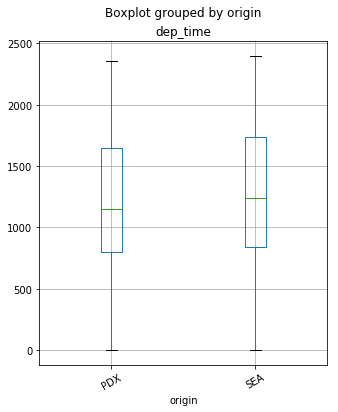

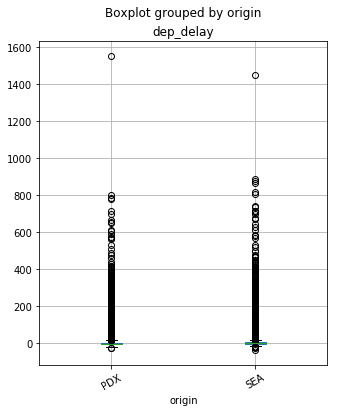

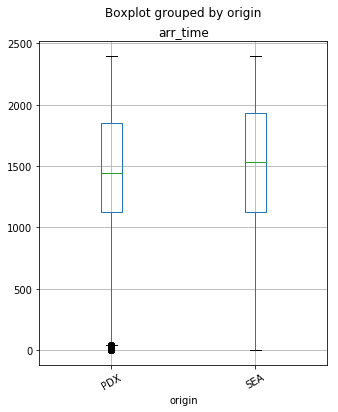

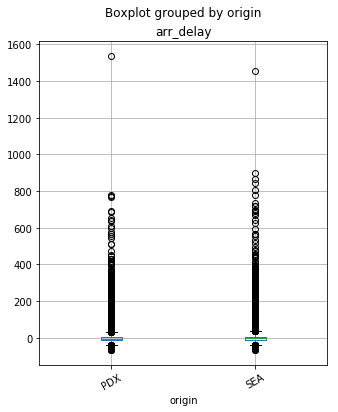

In [3]:
df_flights.boxplot('dep_time','origin',rot = 30,figsize=(5,6))
df_flights.boxplot('dep_delay','origin',rot = 30,figsize=(5,6))
df_flights.boxplot('arr_time','origin',rot = 30,figsize=(5,6))
df_flights.boxplot('arr_delay','origin',rot = 30,figsize=(5,6))

In [4]:
copy_df_flights = df_flights.select_dtypes(include=['object']).copy()
copy_df_flights.head()

,carrier,tailnum,origin,dest
0,AS,N508AS,PDX,ANC
1,US,N195UW,SEA,CLT
2,UA,N37422,PDX,IAH
3,US,N547UW,PDX,CLT
4,AS,N762AS,SEA,ANC


In [5]:
#checking the null value of the dataset
print(df_flights.isnull().sum())
print('-------')
print(copy_df_flights.isnull().sum())

year            0
month           0
day             0
dep_time      857
dep_delay     857
arr_time      988
arr_delay    1301
carrier         0
tailnum       248
flight          0
origin          0
dest            0
air_time     1301
distance        0
hour          857
minute        857
dtype: int64
-------
carrier      0
tailnum    248
origin       0
dest         0
dtype: int64


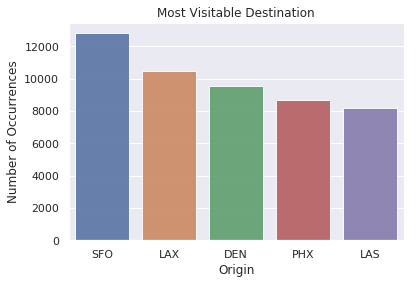

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
origin_count = copy_df_flights['dest'].value_counts().head()
sns.set(style="darkgrid")
sns.barplot(origin_count.index, origin_count.values, alpha=0.9)
plt.title('Most Visitable Destination')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Origin', fontsize=12)
plt.show()

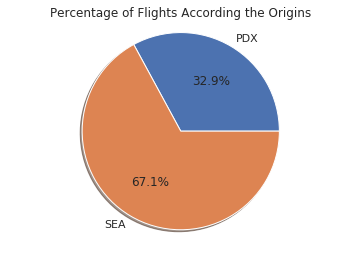

In [7]:
labels = copy_df_flights['origin'].astype('category').cat.categories.tolist()
counts = copy_df_flights['origin'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True) #autopct is show the % on plot
ax1.axis('equal')
plt.title('Percentage of Flights According the Origins')
plt.show()

1065.7544014249554


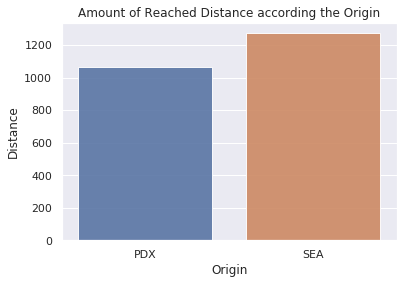

In [33]:
distance_count = df_flights.groupby('origin')['distance'].mean()
dataPDX = distance_count.loc['PDX']
print(dataPDX)
sns.set(style="darkgrid")
sns.barplot(distance_count.index, distance_count.values, alpha=0.9)
plt.title('Amount of Reached Distance according the Origin')
plt.ylabel('Distance', fontsize=12)
plt.xlabel('Origin', fontsize=12)
plt.show()

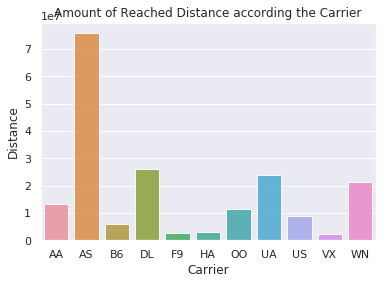

In [0]:
distance_count = df_flights.groupby('carrier')['distance'].sum()
sns.set(style="darkgrid")
sns.barplot(distance_count.index, distance_count.values, alpha=0.9)
plt.title('Amount of Reached Distance according the Carrier')
plt.ylabel('Distance', fontsize=12)
plt.xlabel('Carrier', fontsize=12)
plt.show()